<a href="https://colab.research.google.com/github/ArunK-ML/ML-Model---Diabetes_Prediction---DataSet/blob/main/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Count Duplicate entry

df.duplicated().sum()

np.int64(3854)

In [5]:
# dropping duplicates

df.drop_duplicates(keep = "last",inplace = True)

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
df["smoking_history"].unique()

array(['never', 'current', 'No Info', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
# Convert to binary classification: Class 2 = positive (0), others = negative (1)

# To change the object into numbers based on ASCII value

from sklearn.preprocessing import LabelEncoder

code = LabelEncoder()

for i in df.columns:
  if df[i].dtype=="object":
    df[i]= code.fit_transform(df[i]) # Encoding

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


**Encoding**

**Gender**

Female = 0,
Male = 1,
Other = 2

**smoking_history**

'never' = 4 , 'No Info' = 0 , 'current' = 1, 'former' = 3, 'ever' = 2, 'not current' = 5

In [9]:
# Where independent = x , dependent = y

x = df.iloc[:,:-1] # x = defining independent columns with all the row
y = df.iloc[:,-1]  # y = defining dependent columns with all the row

In [10]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [11]:
y.name

'diabetes'

In [12]:
# Check the shape of x and y

x.shape, y.shape

((96146, 8), (96146,))

In [13]:
# Count the diabetes

df["diabetes"].value_counts()

,count
diabetes,
0,87664
1,8482


In [14]:
df.shape

(96146, 9)

# **Machine Learning**

Total number of rows : 96146

The total rows take 100% and we splite :

*   30% for test - 28844 approx. ----> x_test + y_test
*   70% for Train - 67302 approx. ----> x_train + y_train


# Is for understanding
Diabetes Count :

*   "0" -> 87664
*   "1" -> 8482

We split 70% and 30% in each diabetes count ("0" & "1")

For "0" -> 30% -> 2545  ---> x_test

For "0" -> 70% -> 5937  ---> x_train

For "1" -> 30% -> 26299  ---> y_test

For "1" -> 70% -> 61365  ---> y_train


Adding 30% -> 2545 + 26299 = 28844 &

70% -> 5937 + 61365 = 67302

In [15]:
# Split data

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((67302, 8), (28844, 8), (67302,), (28844,))

In [38]:
y_train.value_counts()

,count
diabetes,
0,61380
1,5922


In [17]:
#Create Model or Train the model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train,y_train)

In [18]:
# Sample Predicting

import numpy as np
vb1 = np.array([[1,35,0,0,4,32.64,9.3,180]])

vb2 = np.array([[1,75,1,1,0,32.64,6.3,180]])


In [23]:
model.predict(vb1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
model.predict(vb2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [41]:
#Predict

y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

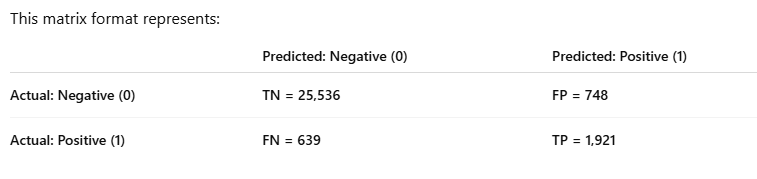

In [36]:
#Metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

confusion_matrix(y_test,y_pred)

array([[25536,   748],
       [  639,  1921]])

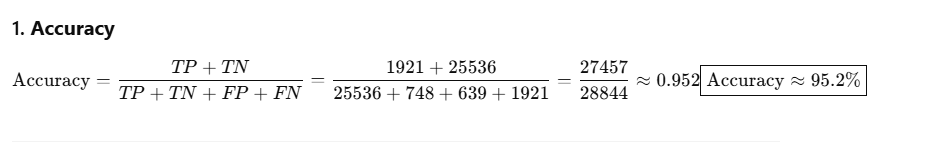

In [30]:
accuracy_score(y_test,y_pred)

0.9519137428928026

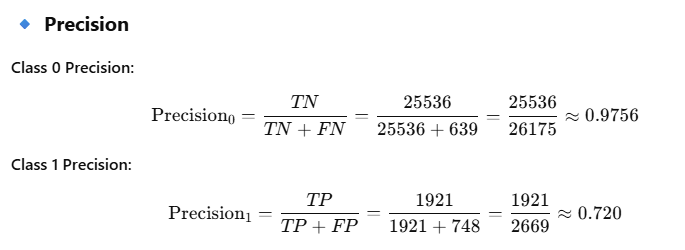

In [45]:
# Precision for class 1
prec_class1 = precision_score(y_test,y_pred)

# Precision for class 0
prec_class0 = precision_score(y_test, y_pred, pos_label=0)

In [46]:
prec_class1 , prec_class0

(0.7197452229299363, 0.9755873925501433)

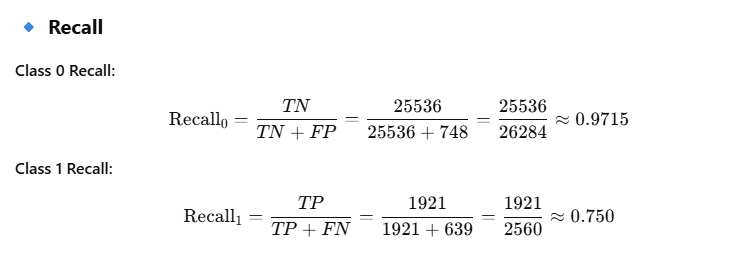

In [48]:
# Recall for class 1
recall_class1 = recall_score(y_test,y_pred)

# Recall for class 0
recall_class0 = recall_score(y_test, y_pred, pos_label=0)

In [49]:
recall_class0 , recall_class1

(0.9715416222797139, 0.750390625)

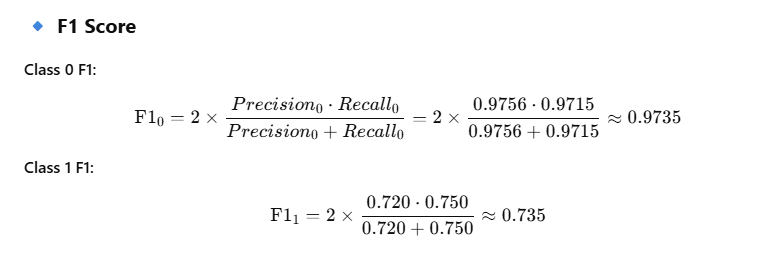

In [50]:
# f1 score for class 1
f1_class1 = f1_score(y_test,y_pred)

# f1 score for class 0
f1_class0 = f1_score(y_test, y_pred, pos_label=0)

In [51]:
f1_class1 , f1_class0

(0.734748517881048, 0.9735603042375951)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     26284
           1       0.72      0.75      0.73      2560

    accuracy                           0.95     28844
   macro avg       0.85      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844

